<a href="https://colab.research.google.com/github/jfogarty/machine-learning-intro-workshop/blob/master/notebooks/plot_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Confusion Matrices

- From [Demystifying ‘Confusion Matrix’ Confusion](https://towardsdatascience.com/demystifying-confusion-matrix-confusion-9e82201592fd) by [salrite](https://towardsdatascience.com/@salrite?source=post_page-----9e82201592fd----------------------) in [towardsdatascience.co](https://towardsdatascience.co)
- and From [Confiusion Matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) in [scikit-learn.org](https://scikit-learn.org/stable/) documentation site.

Updated by [John Fogarty](https://github.com/jfogarty) for Python 3.6 and [Base2 MLI](https://github.com/base2solutions/mli) and [colab](https://colab.research.google.com) standalone evaluation.

In [0]:
%matplotlib inline

# Confusion Matrix


In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix,[5] is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).[2] The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another).

We will use the [UCI Bank Note Authentication Dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) for demystifying the confusion behind Confusion Matrix. We will predict and evaluate our model, and along the way develop our conceptual understanding. Also will be providing the links to further reading wherever required.

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import os
import itertools
import warnings
warnings.filterwarnings("ignore")

## Understanding the Data

The Dataset contains properties of the wavelet transformed image of $400x400$ pixels of a BankNote, and can be found here. It is recommended for reader to download the dataset and follow along. Further for reference, you can find the Kaggle Notebook [here](https://www.kaggle.com/ritesaluja/binaryclassification-and-modelevaluation-example/).

<figure>
  <center>
    <img src="https://miro.medium.com/max/288/1*BAAk374bKlraxnJvV3_hyg.png" width="60%" >
    <figcaption>Confusion Matrix for Binary Classification</figcaption>
  </center>
</figure>

In [2]:
URL='https://datahub.io/machine-learning/banknote-authentication/r/banknote-authentication.csv'
URL='https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
!curl $URL -o ./banknote-authentication.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46400  100 46400    0     0   197k      0 --:--:-- --:--:-- --:--:--  197k


In [3]:
colnames = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df = pd.read_csv('./banknote-authentication.csv', names=colnames)
df.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
#Class is our Target Label, with zero indicating the Bank Note is Forged and 1 Indicating it is Legit
df['class'].value_counts() #to check if the data is equally balanced between the two classes for prediction

0    762
1    610
Name: class, dtype: int64

## Building the Model

Splitting the Data into Training and Test Set, Train is on which we will be training our model and the evaluation will be performed on the Test set, we are skipping the Validation set here for simplicity and lack of sufficient data. In general the data is divided into three sets Train, Test and Validation, read more [here](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7).

In [0]:
#defining features and target variable
y = df['class']
X = df.drop(columns = ['class'])

#splitting the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Next, we will make a simple Logistic Regression Model for our Prediction.

In [0]:
#Predicting using Logistic Regression for Binary classification 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train) #fitting the model 
y_pred = LR.predict(X_test) #prediction 

## Model Evaluation

Let’s plot the most confusing Confusion Matrix? Just Kidding, Lets have a simple Confusion Matrix (Scikit-learn documentation used for the below code).

<figure>
  <center>
    <img src="https://miro.medium.com/max/288/1*BAAk374bKlraxnJvV3_hyg.png" width="60%" >
    <figcaption>Confusion Matrix for Binary Classification</figcaption>
  </center>
</figure>



Confusion matrix, without normalization
[[189   2]
 [  2 150]]


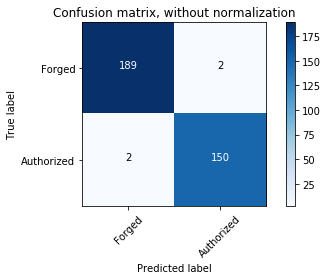

In [7]:
#Evaluation 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Forged','Authorized'],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.99 0.01]
 [0.01 0.99]]


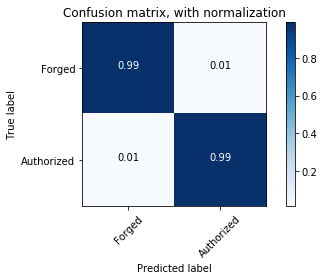

In [20]:
# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['Forged','Authorized'],
                      title='Confusion matrix, with normalization',
                      normalize=True)

In [8]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  189
False Positives:  2
False Negatives:  2
True Positives:  150


## How Accurate is our Model?

In [9]:
#Accuracy (%) 
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%".format(Accuracy))

Accuracy 98.83%


### Does Accuracy matter?

Not always, it may not be the right measure at times, especially if your Target class is not balanced (data is skewed). Then you may consider additional metrics like Precision, Recall, F score (combined metric), but before diving in lets take a step back and understand the terms that form the basis for these.

### Some Basic Terms

- **True Positive** — Label which was predicted Positive (in our scenario Authenticated Bank Notes) and is actually Positive (i.e. belong to Positive ‘Authorized’ Class).

- **True Negative** — Label which was predicted Negative (in our scenario Forged Bank Notes) and is actually Negative (i.e. belong to Negative ‘Forged’ Class).

- **False Positive** — Label which was predicted as Positive, but is actually Negative, or in simple words the Note wrongly predicted as Authentic by our Model, but is actually Forged. In Hypothesis Testing it is also known as Type 1 error or the incorrect rejection of Null Hypothesis, refer this to read more about Hypothesis testing.

- **False Negatives** — Labels which was predicted as Negative, but is actually Positive (Authentic Note predicted as Forged). It is also known as Type 2 error, which leads to the failure in rejection of Null Hypothesis.

Now lets look at most common evaluation metrics every Machine Learning Practitioner should know!

<figure>
  <center>
    <img src="https://miro.medium.com/max/243/1*B0UVzVktFU9uQ1t6_hfN-A.png" width="50%" >
  </center>
</figure>

## Metrics beyond Accuracy

### Precision

It is the ‘Exactness’, ability of the model to return only relevant instances. If your use case/problem statement involves minimizing the False Positives, i.e. in current scenario if you don’t want the Forged Notes to be labelled as Authentic by the Model then Precision is something you need.

In [10]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

Precision 0.99


### Recall

It is the ‘Completeness’, ability of the model to identify all relevant instances, True Positive Rate, aka Sensitivity. In the current scenario if your focus is to have the least False Negatives i.e. you don’t Authentic Notes to be wrongly classified as Forged then Recall can come to your rescue.

In [11]:
#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

Recall 0.99


### F1 Measure

Harmonic mean of Precision & Recall, used to indicate a balance between Precision & Recall providing each equal weightage, it ranges from $0$ to $1$. F1 Score reaches its best value at 1 (perfect precision & recall) and worst at $0$, read more [here](https://stats.stackexchange.com/questions/49226/how-to-interpret-f-measure-values).

In [12]:
#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.99


### F-beta Measure

It is the general form of F measure — Beta $0.5$ & $2$ are usually used as measures, $0.5$ indicates the Inclination towards Precision whereas $2$ favors Recall giving it twice the weightage compared to precision.

<figure>
  <center>
    <img src="https://miro.medium.com/max/610/1*5HgVbqXE3tejNUNI3tnoNg.png" width="50%" >
  </center>
</figure>

In [13]:
#Fbeta score
def fbeta(precision, recall, beta):
    return ((1+pow(beta,2))*precision*recall)/(pow(beta,2)*precision + recall)
            
f2 = fbeta(Precision, Recall, 2)
f0_5 = fbeta(Precision, Recall, 0.5)

print("F2 {:0.2f}".format(f2))
print("\nF0.5 {:0.2f}".format(f0_5))

F2 0.99

F0.5 0.99


### Specificity

It is also referred to as ‘True Negative Rate’ (Proportion of actual negatives that are correctly identified), i.e. more True Negatives the data hold the higher its Specificity.

In [14]:
#Specificity 
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.99


## ROC (Receiver Operating Characteristic curve)

The plot of ‘True Positive Rate’ (Sensitivity/Recall) against the ‘False Positive Rate’ (1-Specificity) at different classification thresholds.

The area under the **ROC curve** (AuC) measures the entire two-dimensional area underneath the curve. It is a measure of how well a parameter can distinguish between two diagnostic groups. Often used as a measure of quality of the classification models.
A random classifier has an area under the curve of $0.5$, while **AUC** for a perfect classifier is equal to $1$.

In [18]:
!pip install scikit-plot

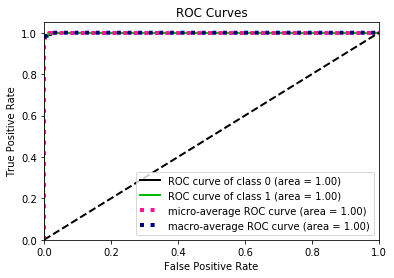

In [19]:
#ROC
import scikitplot as skplt #to make things easy
y_pred_proba = LR.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

# Beyond True and False

Example of confusion matrix usage to evaluate the quality of the output of a classifier on the iris data set. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without normalization by class support size (number of elements in each class). 



<figure>
  <center>
      <img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_001.png" />
  <figurecaption></figurecaption>  
    </center>
</figure>


This kind of normalization can be interesting in case of class imbalance to have a more visual interpretation of which class is being misclassified.


<figure>
  <center>
      <img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_002.png" />
  <figurecaption></figurecaption>  
    </center>
</figure>

Here the results are not as good as they could be as our choice for the regularization parameter C was not the best. In real life applications this parameter is usually chosen using [Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search).

## Three Class Confusion Matrix

This example from using the classic Iris dataset illustrates a non-binary matrix.



In [0]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### End of notebook.